In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets.samples_generator import make_blobs, make_moons
from sklearn.preprocessing import StandardScaler
X, Y = make_blobs(n_samples=500, centers=5, cluster_std=0.80, random_state=0)
X = StandardScaler().fit_transform(X)
Y = np.reshape(Y, (-1,1))
matrix = np.concatenate((X, Y), axis=1)
data = pd.DataFrame(matrix)
data.columns = ['X', 'Y', 'Centers']
display(data)

C:\Users\krzys\.conda\envs\r_python_together\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


,X,Y,Centers
0,0.179475,-0.887330,1.0
1,-0.434891,0.476934,0.0
2,0.088348,0.805723,0.0
3,-0.834877,0.185184,2.0
4,-0.423814,0.135387,0.0
...,...,...,...
495,2.046435,-1.934287,4.0
496,-0.554311,0.917412,0.0
497,-1.223846,-0.090176,2.0
498,-0.946569,-0.046269,2.0


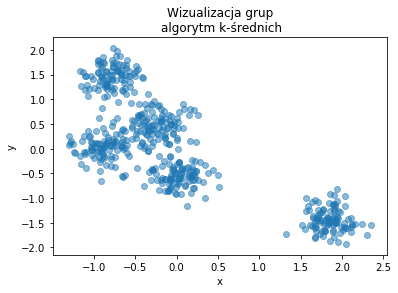

In [3]:
x = data['X']
y = data['Y']
plt.scatter(x, y, alpha=0.5)
plt.title('Wizualizacja grup\n algorytm k-średnich')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

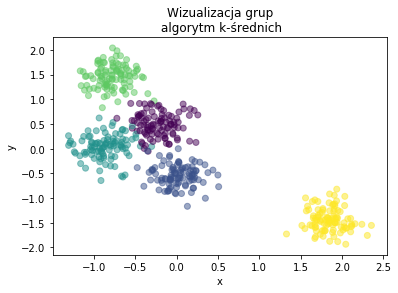

In [4]:
x = data['X']
y = data['Y']
colors = data['Centers']
plt.scatter(x, y, c=colors, alpha=0.5)
plt.title('Wizualizacja grup\n algorytm k-średnich')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0, verbose=0)
X = data[['X', 'Y']] 
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [6]:
y_kmeans = kmeans.predict(X)

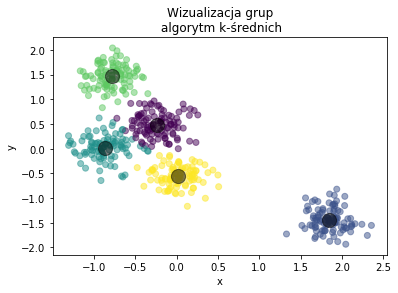

In [7]:
x = data['X']
y = data['Y']
plt.scatter(x, y, c=y_kmeans, alpha=0.5)
centers = kmeans.cluster_centers_
cx = centers[:, 0]
cy = centers[:, 1]
plt.scatter(cx, cy, c='black', s=200, alpha=0.5);
plt.title('Wizualizacja grup\n algorytm k-średnich')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [8]:
y_cluster = pd.DataFrame(y_kmeans)
y_cluster.columns = ['Cluster']
y_cluster.reset_index(drop=True, inplace=True)
data.reset_index(drop=True, inplace=True)
data_cluster = pd.concat([data, y_cluster], axis=1)
display(data_cluster)

,X,Y,Centers,Cluster
0,0.179475,-0.887330,1.0,4
1,-0.434891,0.476934,0.0,0
2,0.088348,0.805723,0.0,0
3,-0.834877,0.185184,2.0,2
4,-0.423814,0.135387,0.0,0
...,...,...,...,...
495,2.046435,-1.934287,4.0,1
496,-0.554311,0.917412,0.0,0
497,-1.223846,-0.090176,2.0,2
498,-0.946569,-0.046269,2.0,2


In [9]:
a = np.int_(data_cluster['Centers'])
b = data_cluster['Cluster']
cross = pd.crosstab(a, b, rownames=['Centers'], colnames=['Cluster'])
display(cross)

Cluster,0,1,2,3,4
Centers,,,,,
0,98,0,2,0,0
1,1,0,1,0,98
2,5,0,95,0,0
3,1,0,0,99,0
4,0,100,0,0,0


In [10]:
X, Y = make_moons(n_samples=500, noise=.05, random_state=0)
X = StandardScaler().fit_transform(X)
Y = np.reshape(Y, (-1,1))
matrix = np.concatenate((X, Y), axis=1)
data = pd.DataFrame(matrix)
data.columns = ['X', 'Y', 'Centers']
display(data)

,X,Y,Centers
0,-0.124793,1.332004,0.0
1,-0.687942,0.429713,1.0
2,-0.448574,-0.297994,1.0
3,1.457411,-0.753936,1.0
4,1.626106,-0.703202,1.0
...,...,...,...
495,-0.060781,-1.040420,1.0
496,-1.466538,0.706607,0.0
497,-0.628832,1.634010,0.0
498,0.346581,0.586661,0.0


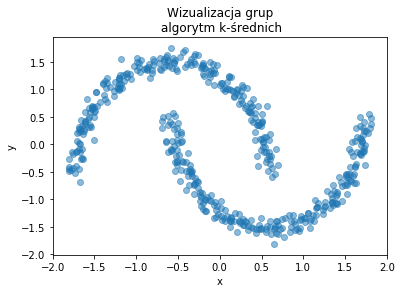

In [11]:
x = data['X']
y = data['Y']
plt.scatter(x, y, alpha=0.5)
plt.title('Wizualizacja grup\n algorytm k-średnich')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

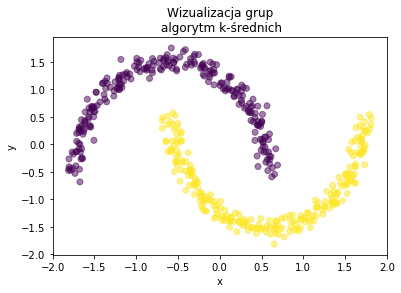

In [12]:
x = data['X']
y = data['Y']
colors = data['Centers']
plt.scatter(x, y, c=colors, alpha=0.5)
plt.title('Wizualizacja grup\n algorytm k-średnich')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, verbose=0)
X = data[['X', 'Y']] 
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [14]:
y_kmeans = kmeans.predict(X)

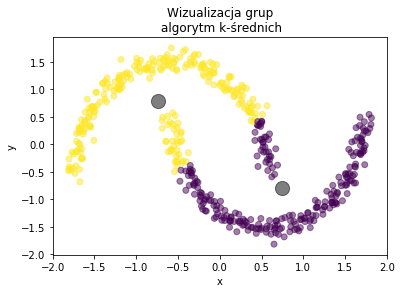

In [15]:
x = data['X']
y = data['Y']
plt.scatter(x, y, c=y_kmeans, alpha=0.5)
centers = kmeans.cluster_centers_
cx = centers[:, 0]
cy = centers[:, 1]
plt.scatter(cx, cy, c='black', s=200, alpha=0.5);
plt.title('Wizualizacja grup\n algorytm k-średnich')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [16]:
y_cluster = pd.DataFrame(y_kmeans)
y_cluster.columns = ['Cluster']
y_cluster.reset_index(drop=True, inplace=True)
data.reset_index(drop=True, inplace=True)
data_cluster = pd.concat([data, y_cluster], axis=1)
display(data_cluster)

,X,Y,Centers,Cluster
0,-0.124793,1.332004,0.0,1
1,-0.687942,0.429713,1.0,1
2,-0.448574,-0.297994,1.0,1
3,1.457411,-0.753936,1.0,0
4,1.626106,-0.703202,1.0,0
...,...,...,...,...
495,-0.060781,-1.040420,1.0,0
496,-1.466538,0.706607,0.0,1
497,-0.628832,1.634010,0.0,1
498,0.346581,0.586661,0.0,1


In [17]:
a = np.int_(data_cluster['Centers'])
b = data_cluster['Cluster']
cross = pd.crosstab(a, b, rownames=['Centers'], colnames=['Cluster'])
display(cross)

Cluster,0,1
Centers,,
0,38,212
1,211,39
